In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from autoviz.AutoViz_Class import AutoViz_Class
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


In [70]:

from google.colab import drive
# Load the data from a CSV file into a DataFrame
bike_df = pd.read_csv('/content/drive/MyDrive/self study/UpGrad/PG Programme in Machine Learning & Artificial Intelligence/Course3_MachineLearning/LinearRegressionAssignment/day.csv')


In [71]:
# Print the first few rows of the DataFrame
bike_df.head()

# Check the column names of the DataFrame
print(bike_df.columns)

# Check the information of the DataFrame
bike_df.info()       

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null   

In [72]:
#In this dataset, we can remove the following columns: 'instant', 'dteday' (since we have separate columns for year, month, and weekday), and 'casual' & 'registered' (as their combined sum is represented by the 'cnt' column).
bike_df = bike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_df.head()
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [73]:
# Understanding each column with their unique values

for column in bike_df:  
    unique_values = bike_df[column].unique()
    print(column, unique_values)


season [1 2 3 4]
yr [0 1]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]
temp [14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.735      8.131653  15.750847
 15.437402  10.731299  11.9925    12.129153  15.952731  13.495847
 15.758268  13.333897  13.013031  14.973897  22.14      19.3725
 13.6325    17.647835  18.108347  14.225237  11.685     10.830847
 

In this dataset, the columns 'season', 'month', 'weekday', and 'weathersit' have integer values representing categorical data. Therefore, we should map these values to their corresponding categorical levels. Afterward, we can proceed with data analysis and predictive modeling.


In [74]:
# Map integer values to categorical labels for 'season', 'mnth', 'weekday', and 'weathersit' columns
bike_df['season'] = bike_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bike_df['mnth'] = bike_df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike_df['weekday'] = bike_df['weekday'].map({6: 'Monday', 0: 'Tuesday', 1: 'Wednesday', 2: 'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday'})
bike_df['weathersit'] = bike_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light_Snow'})

# Check the DataFrame's info to verify the data types of all columns
bike_df.info()
bike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Shape of your Data Set: (730, 13)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 2.114


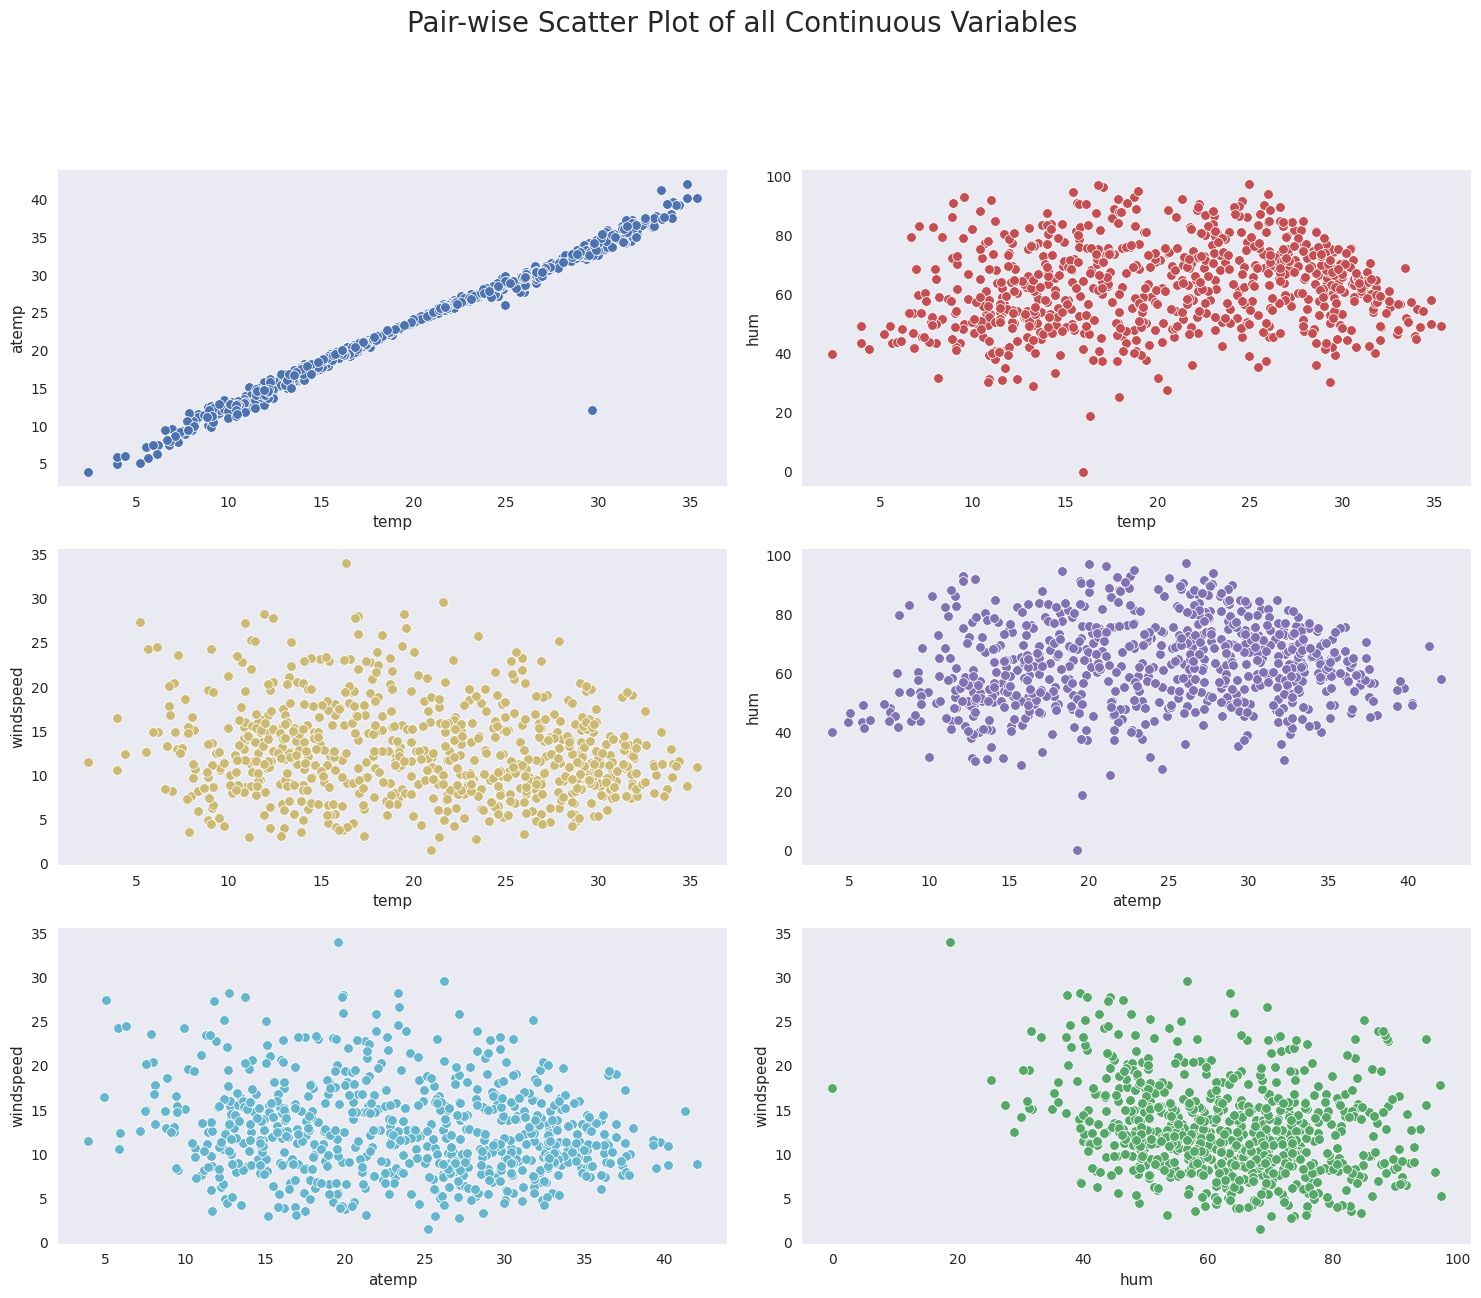

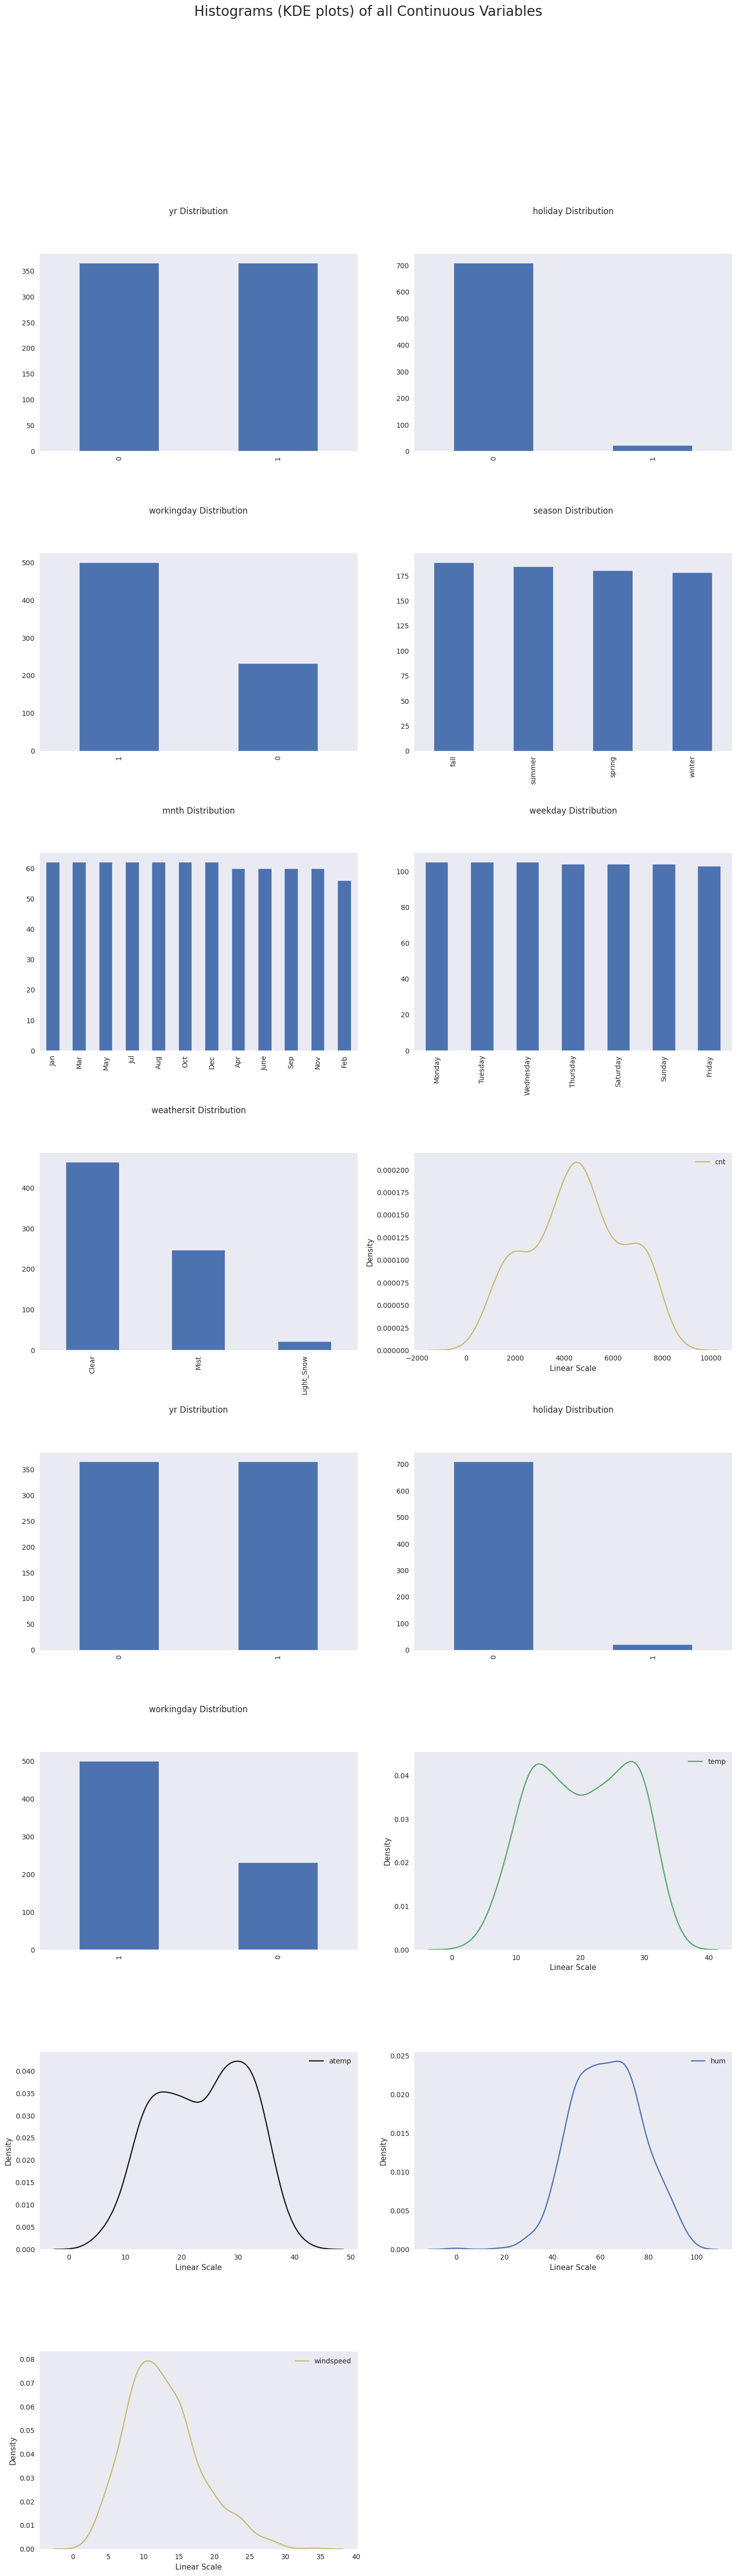

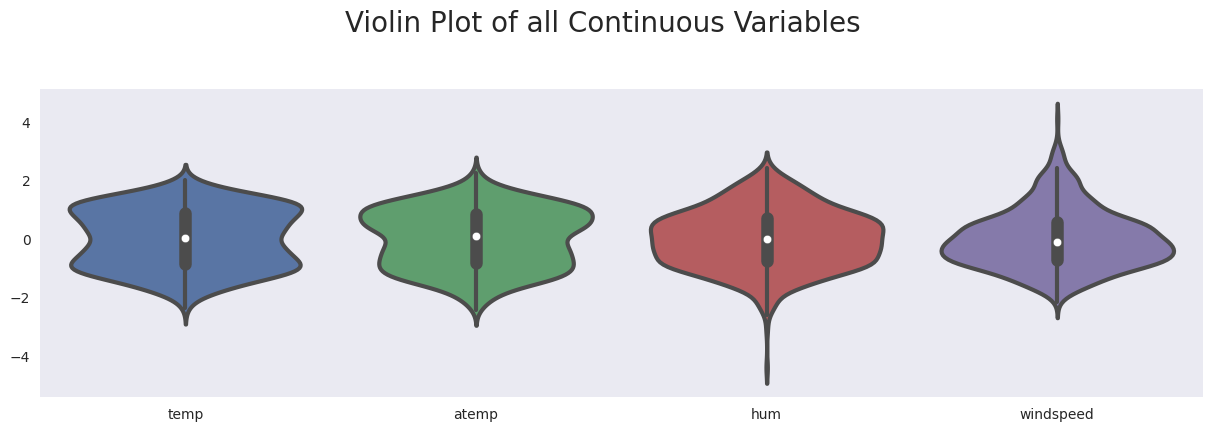

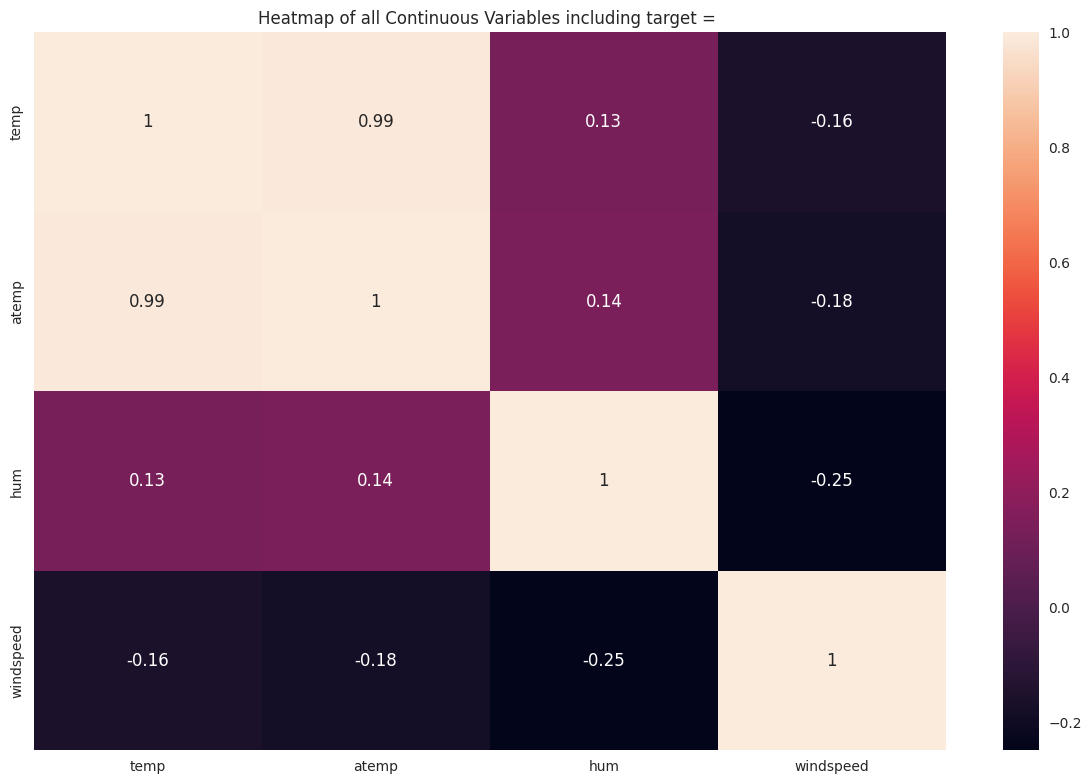

<Figure size 1500x17600 with 0 Axes>

In [75]:
# Perform Exploratory Data Analysis (EDA) using the AutoViz library

# Save the updated DataFrame to a CSV file
bike_df.to_csv('updated_bike_df.csv')

# Create an instance of the AutoViz class
av = AutoViz_Class()

filename="/content/updated_bike_df.csv"
sep=",",
dft=av.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=40
)
  

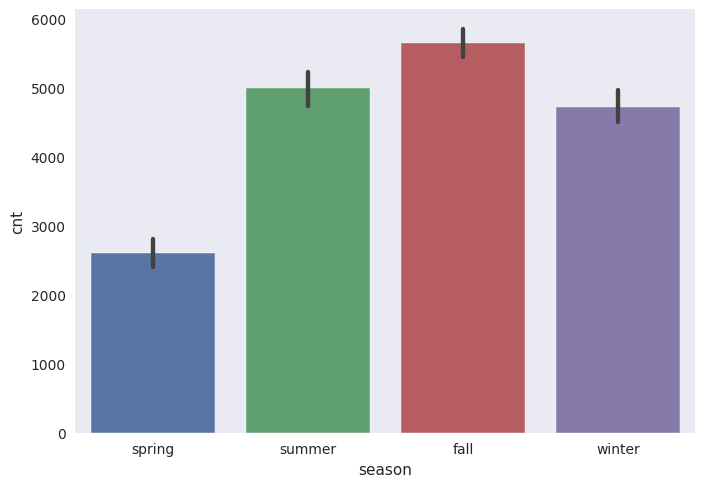

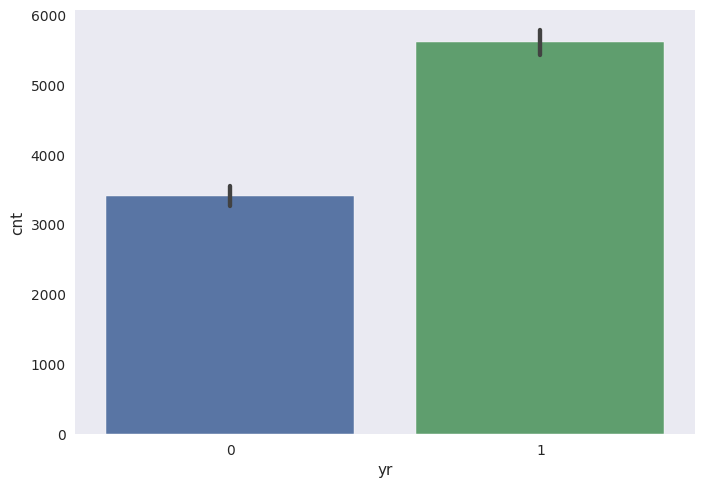

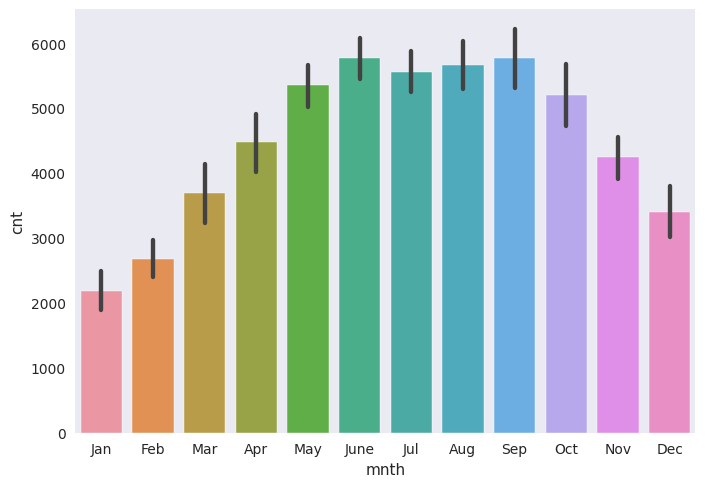

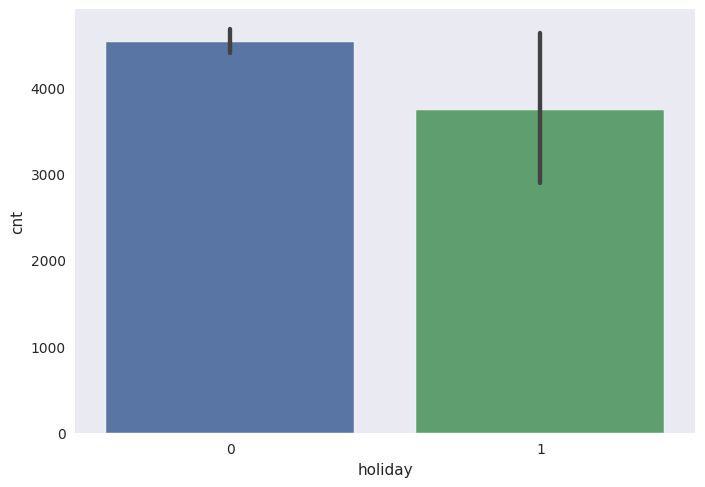

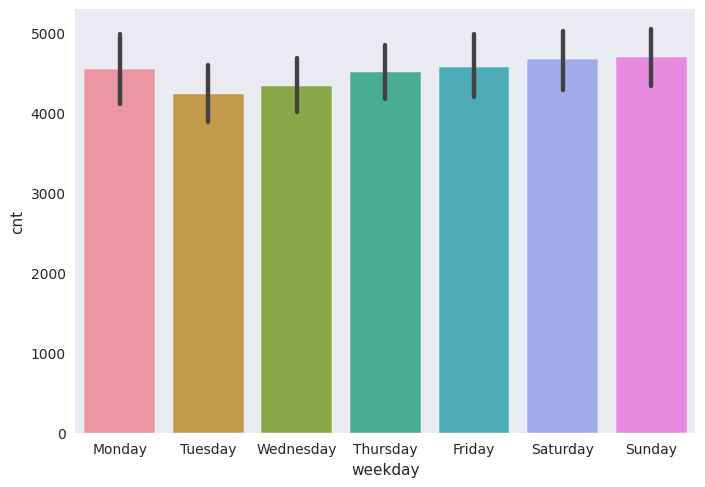

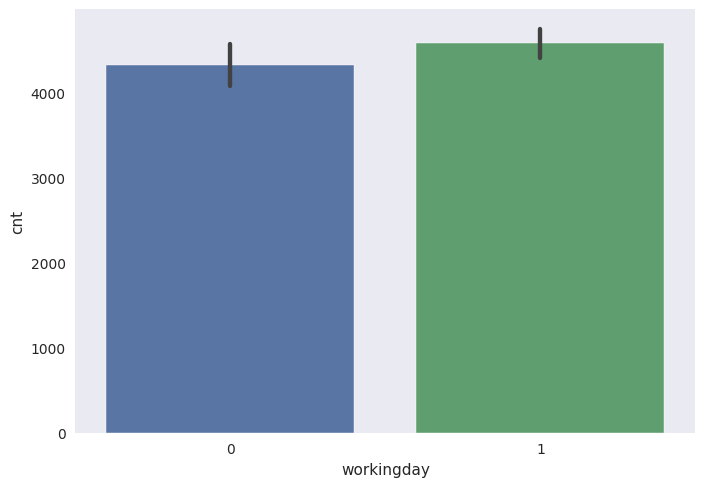

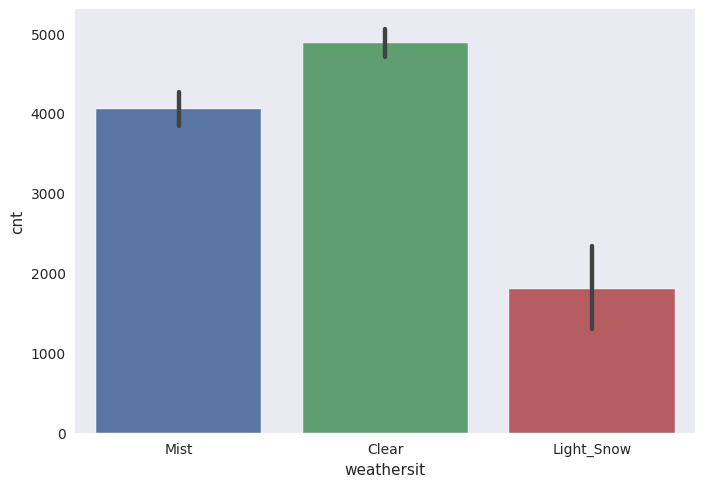

In [76]:
# Create bar plots for each categorical variable against the 'cnt' column
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for category in categorical_columns:
    sns.barplot(data=bike_df, x=category, y='cnt')
    plt.show()


Observations from the Exploratory Data Analysis - Univariate analysis:

1. Upon examining the scatter plots for continuous variables, it is clear that there is a strong correlation between temperature and the perceived temperature (atemp). However, no notable relationships are observed among other continuous variables.

2. The histograms of categorical variables indicate that the dataset contains very few observations of holidays. The four seasons (spring, fall, summer, and winter) have nearly equal counts of observations. Furthermore, non-working day observations make up roughly 50% of working days.

3. Regarding the weather conditions, there are approximately 450 days with clear weather, close to 250 days with misty weather, and a mere 25 days with light snow.

4. The correlation heatmap reveals a high correlation value of about 0.99 between temperature and perceived temperature (atemp).


**Findings from EDA - Bivariate analysis:**
1.	The scatter plot of total bike rentals and temperature demonstrates a near-linear correlation between them. 
2.	Bike rental demand is higher during the fall, summer, and winter seasons compared to the spring season, which has a notably lower demand.
3.	There is a significant increase in bike rentals from 2018 to 2019, with an almost 100% rise.
4.	Monthly demand patterns show a steady increase in bike rentals from January to June, remaining stable until September, and then gradually declining afterward.
5.	Predictor variables such as holiday, weekday, and working day do not have a substantial impact on bike rentals, as all levels of these categorical variables exhibit similar effects.
6.	Clear and misty weather conditions result in high bike rental demand, while light snow weather leads to very low demand.
7.	Examining the box plot of bike rentals with holidays as a category reveals that when there is no holiday, bike rentals are symmetrically distributed. However, when there is a holiday, the distribution is positively skewed, indicating that the majority of bike rental demand is substantial and falls between 3,000 and 6,000.


**Preparing Data for Predictive Modeling**

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')


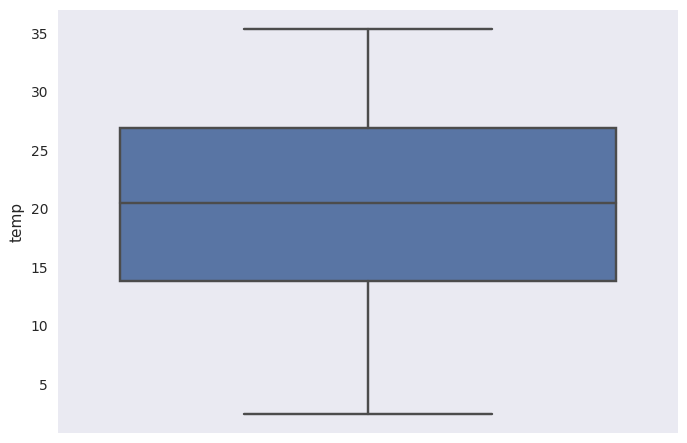

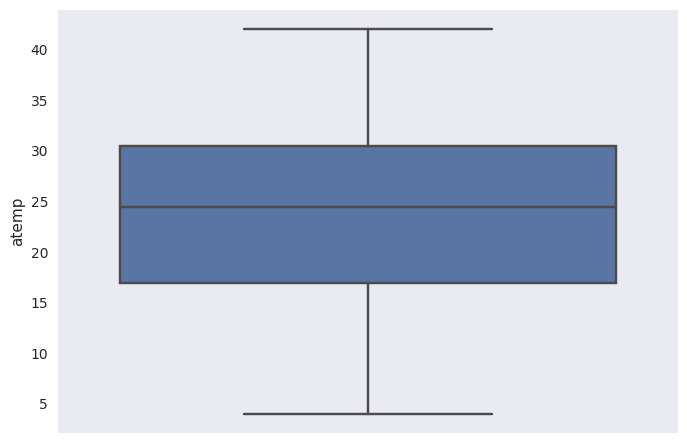

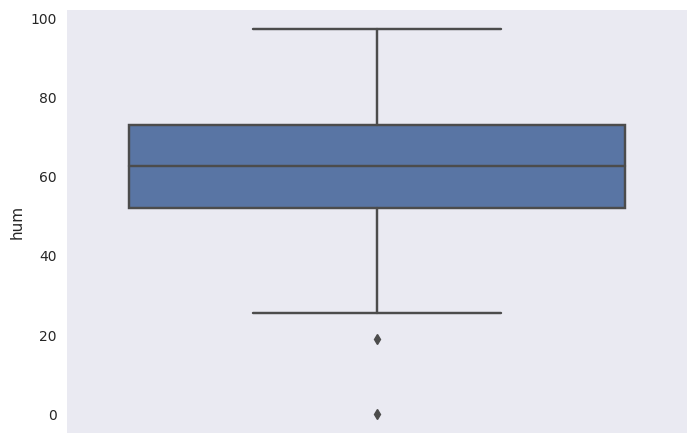

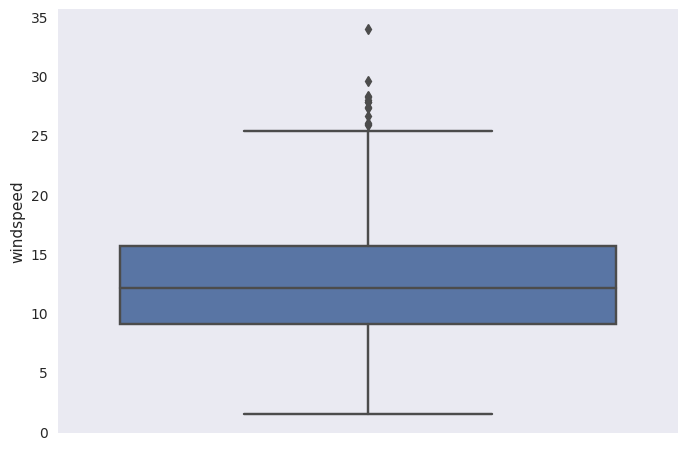

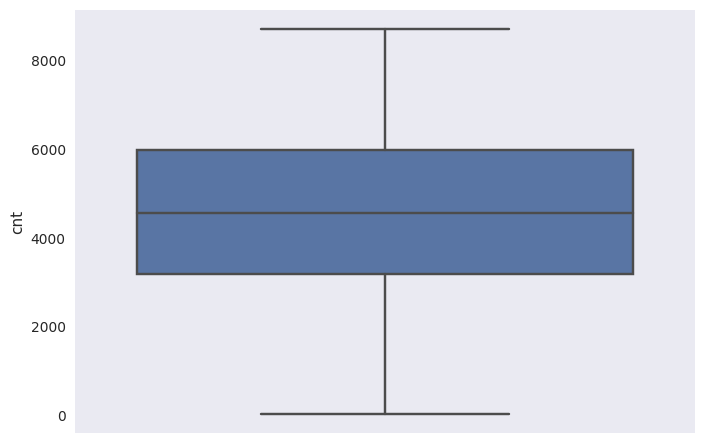

In [77]:
# Creating a new DataFrame with only the numeric columns to detect outliers using box plot method
numeric_cols_df = bike_df.select_dtypes(exclude='object')
print(numeric_cols_df.columns)

# Dropping columns that have only 1s and 0s
numeric_cols_df = numeric_cols_df.drop(['yr', 'holiday', 'workingday'], axis=1)

# Create box plots for each column in the numeric_cols_df DataFrame
for column in numeric_cols_df.columns:
    sns.boxplot(data=numeric_cols_df, y=column)
    plt.show()


**Converting Categorical Columns using One Hot Encoding.**


In [78]:
# Convert categorical columns to dummy variables using one-hot encoding
season_dummy = pd.get_dummies(bike_df['season'], drop_first=True)
mnth_dummy = pd.get_dummies(bike_df['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(bike_df['weekday'], drop_first=True)
weathersit_dummy = pd.get_dummies(bike_df['weathersit'], drop_first=True)

# Concatenate the dummy variables to the original DataFrame
bike_df = pd.concat([bike_df, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis=1)

# Print the updated DataFrame
print(bike_df.head())


   season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     Monday           0       Mist  14.110847   
1  spring   0  Jan        0    Tuesday           0       Mist  14.902598   
2  spring   0  Jan        0  Wednesday           1      Clear   8.050924   
3  spring   0  Jan        0   Thursday           1      Clear   8.200000   
4  spring   0  Jan        0     Friday           1      Clear   9.305237   

      atemp      hum  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
0  18.18125  80.5833  ...    0    0       1         0       0         0   
1  17.68695  69.6087  ...    0    0       0         0       0         0   
2   9.47025  43.7273  ...    0    0       0         0       0         0   
3  10.60610  59.0435  ...    0    0       0         0       0         1   
4  11.46350  43.6957  ...    0    0       0         0       0         0   

   Tuesday  Wednesday  Light_Snow  Mist  
0        0          0           0     1  
1       

In [79]:
# Drop the original categorical columns
bike_df = bike_df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

# Drop one of the highly correlated columns ('atemp')
bike_df = bike_df.drop(['atemp'], axis=1)

# Print the remaining columns
print(bike_df.columns)


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light_Snow', 'Mist'],
      dtype='object')


**Splitting the DataFrame into Training and Testing Sets.**

In [80]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
df_train, df_test = train_test_split(bike_df, train_size=0.75, random_state=42)


In [81]:
#Scaling of numeric columns using statndard scaler
scaler=StandardScaler()  

In [82]:
df_train[['temp','hum','windspeed','cnt']]=scaler.fit_transform(df_train[['temp','hum','windspeed','cnt']])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow,Mist
653,1,0,1,-0.181228,-0.543550,-0.066980,1.538275,0,0,1,...,1,0,0,0,0,1,0,0,0,0
668,1,0,1,-0.790484,0.223127,-0.277175,0.523674,0,0,1,...,1,0,0,0,0,0,0,0,0,1
694,1,0,1,-1.033272,-0.705726,-1.899069,0.276726,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,1.486217,-0.596627,-0.411638,-0.146540,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18,0,0,1,-1.149585,0.754409,0.285678,-1.495218,1,0,0,...,0,0,0,0,0,0,0,0,0,1


**Splitting df_train into X_train and y_train**

In [83]:
y_train=df_train.pop('cnt')
X_train=df_train

# **Linear regression model using SKLearn with RFE**

In [84]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

**keep number_features as default means half of features**

In [85]:
from sklearn.feature_selection import RFE

# Create a Recursive Feature Elimination object and fit it to the training data
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 6),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', False, 13),
 ('Jan', False, 8),
 ('Jul', True, 1),
 ('June', False, 12),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 15),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [86]:
# Get the names of the selected columns from the RFE object
req_col = X_train.columns[rfe.support_]
# Select the important columns identified by the RFE algorithm from the training data
X_train_req = X_train[req_col]


## **Building Linear regression model using statsmodel**

In [87]:
# Drop the 'holiday' column as it has low significance based on the linear regression model
X_train_req = X_train_req.drop('holiday', axis=1)

# Add a constant (intercept) to the training data
X_train_lm = sm.add_constant(X_train_req)

# Create a linear regression model using Ordinary Least Squares (OLS)
linear_model = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     207.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.09e-198
Time:                        16:44:43   Log-Likelihood:                -283.59
No. Observations:                 547   AIC:                             595.2
Df Residuals:                     533   BIC:                             655.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4720      0.055     -8.566      0.000      -0.580      -0.364
yr             1.0499      0.035     29.587      0.000       0.980       1.120
workingday     0.2202      0.047      4.688      0.000       0.128       0.312
temp           0.4142      0.032     12.845      0.000       0.351       0.478
spring        -0.6672      0.071     -9.458      0.000      -0.806      -0.529
winter         0.3981      0.060      6.684      0.000       0.281       0.515
Dec           -0.2856      0.076     -3.763      0.000      -0.435      -0.136
Jul           -0.2094      0.071     -2.964      0.003      -0.348      -0.071
Mar            0.2256      0.076      2.981      0.003       0.077       0.374
Nov           -0.3690      0.079     -4.668      0.000      -0.524      -0.214
Sep            0.2390      0.066      3.635      0.000       0.110       0.368
Monday         0.2430      0.063      3.886      0.000       0.120       0.366
Light_Snow    -1.2358      0.104    -11.861      0.000      -1.440      -1.031
Mist          -0.3631      0.038     -9.542      0.000      -0.438      -0.288
==============================================================================
Omnibus:                       81.709   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.849
Skew:                          -0.790   Prob(JB):                     3.61e-42
Kurtosis:                       5.424   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Calculate the VIF for each feature
# Create a DataFrame to store the results
vif = pd.DataFrame()

# Assign the features to X
X = X_train_req

# Calculate the VIF for each feature and store the results in the DataFrame
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round the VIF values to two decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sort the DataFrame by descending VIF values
vif = vif.sort_values(by='VIF', ascending=False)

vif
#no feature shows value of VIF >=5, so there is no multicollinearity in model

,Features,VIF
2,temp,3.13
3,spring,2.95
1,workingday,2.69
4,winter,2.66
0,yr,1.92
8,Nov,1.88
12,Mist,1.53
6,Jul,1.47
5,Dec,1.39
10,Monday,1.31


## **Residual Analysis**

Text(0.5, 0.98, 'Distribution of Error Terms')

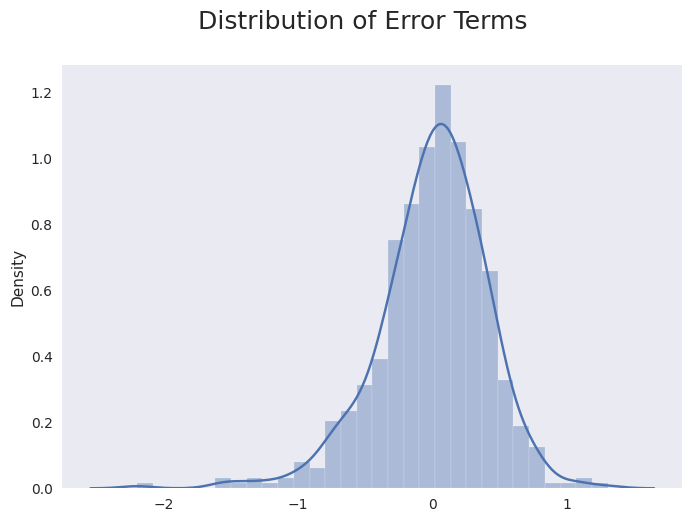

In [89]:
y_train_pred=linear_model.predict(X_train_lm)
fig=plt.figure()
sns.distplot((y_train-y_train_pred))
fig.suptitle('Distribution of Error Terms',fontsize=18)

# **Making predictions**

In [90]:
## Transform the df_test data using the scaler object
df_test[['temp', 'hum', 'windspeed', 'cnt']] = scaler.transform(df_test[['temp', 'hum', 'windspeed', 'cnt']])

## Get the target variable y_test and predictor variables X_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test = X_test[X_train_req.columns]  ## select only the columns that were selected in X_train_req

## Add constant to X_test data
X_test_lm = sm.add_constant(X_test)

## Predict the target variable using X_test_lm and the trained model 'linear_model'
y_pred = linear_model.predict(X_test_lm)


## **Final Step : Model Evaluation**

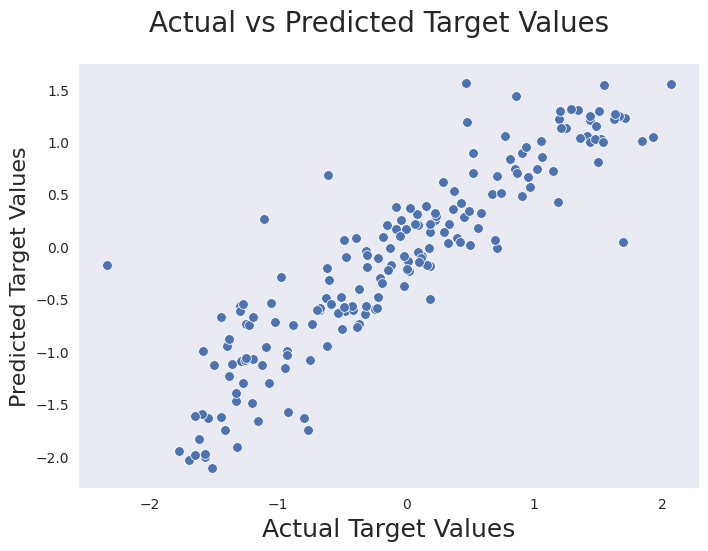

In [91]:
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
fig.suptitle('Actual vs Predicted Target Values', fontsize = 20) # Setting the plot title
plt.xlabel('Actual Target Values', fontsize = 18) # Setting X-axis label
plt.ylabel('Predicted Target Values', fontsize = 16) # Setting Y-axis label
plt.show()

